### Data

In [1]:
plt.style.use('bmh')
color = '#1240AB'

pd.options.display.float_format = '{:,.4f}'.format

In [2]:
df = pd.read_pickle('../data/df_rents.pkl')

df['reg_split'] = df['reg_year'].map(lambda x: '1. Before 2018' if x < '2018' else '2. After 2018')

delta = 0.05
filt = ~df['Property Size (sq.m) RANK'].between(delta,1-delta)
df.loc[filt, 'Property Size (sq.m)'] = np.nan

print(df.shape)
df[:3]

(5475131, 54)


,Ejari Contract Number,Registration Date,Start Date,End Date,Property ID,Area,Contract Amount,Annual Amount,Property Size (sq.m),Property Type,Property Sub Type,Usage,Nearest Metro,Nearest Mall,Nearest Landmark,No of Units,Project,Property Type CLEAN,Property Sub Type CLEAN,Usage CLEAN,Nearest Landmark CLEAN,Nearest Mall CLEAN,Nearest Metro CLEAN,Project CLEAN,reg_day,reg_month,reg_quarter,reg_year,st_day,st_month,st_quarter,st_year,Contract Years,Annual Amount unit,Price per sq.m,Annual Amount unit LOG,Property Size (sq.m) LOG,Price per sq.m LOG,Annual Amount unit RANK,Property Size (sq.m) RANK,Price per sq.m RANK,new_version,free_hold,region,sector,region LABEL,Project CLEAN LABEL,Nearest Metro CLEAN LABEL,Nearest Mall CLEAN LABEL,Nearest Landmark CLEAN LABEL,Property Type CLEAN LABEL,Property Sub Type CLEAN LABEL,Usage CLEAN LABEL,reg_split
0,120220603001774,2022-06-03 12:15:42,2022-06-03,2023-06-02,-120220603001774,Dubai Investment Park First,"6,500.0000","6,500.0000",10.0000,Virtual Unit,Office,Commercial,DANUBE Metro Station,Ibn-e-Battuta Mall,Expo 2020 Site,1,NaN,Virtual Unit,Office,Commercial,Expo 2020 Site,Ibn-e-Battuta Mall,DANUBE Metro Station,,2022-06-03,2022-06-01,2022Q2,2022,2022-06-03,2022-06-01,2022Q2,2022,1.0000,"6,500.0000",650.0000,8.7796,2.3026,6.4770,0.0516,0.3087,0.0894,1,1,Dubai Investment Park 1,5.0000,18,0,9,5,6,2,2,1,2. After 2018
1,120220603001738,2022-06-03 12:11:13,2022-06-03,2023-06-02,-120220603001738,Dubai Investment Park First,"7,500.0000","7,500.0000",10.0000,Virtual Unit,Office,Commercial,DANUBE Metro Station,Ibn-e-Battuta Mall,Expo 2020 Site,1,NaN,Virtual Unit,Office,Commercial,Expo 2020 Site,Ibn-e-Battuta Mall,DANUBE Metro Station,,2022-06-03,2022-06-01,2022Q2,2022,2022-06-03,2022-06-01,2022Q2,2022,1.0000,"7,500.0000",750.0000,8.9227,2.3026,6.6201,0.0783,0.3087,0.1227,1,1,Dubai Investment Park 1,5.0000,18,0,9,5,6,2,2,1,2. After 2018
2,120220603001709,2022-06-03 12:06:54,2022-06-06,2023-06-05,-120220603001709,Burj Khalifa,"10,000.0000","10,000.0000",19.0000,Virtual Unit,Office,Commercial,Buj Khalifa Dubai Mall Metro Station,Dubai Mall,Downtown Dubai,1,NaN,Virtual Unit,Office,Commercial,Downtown Dubai,Dubai Mall,Buj Khalifa Dubai Mall Metro Station,,2022-06-03,2022-06-01,2022Q2,2022,2022-06-06,2022-06-01,2022Q2,2022,1.0000,"10,000.0000",526.3158,9.2103,2.9444,6.2659,0.1465,0.6936,0.0395,1,1,Burj Khalifa,3.0000,24,0,14,0,4,2,2,1,2. After 2018


In [3]:
n = df.shape[0]
s = pd.concat([(df.isnull().sum()).reset_index().T, df.nunique().reset_index().T[1:], df.dtypes.reset_index().T[1:]])
s.index = ['feat','nulls','unique','type']
s

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
feat,Ejari Contract Number,Registration Date,Start Date,End Date,Property ID,Area,Contract Amount,Annual Amount,Property Size (sq.m),Property Type,Property Sub Type,Usage,Nearest Metro,Nearest Mall,Nearest Landmark,No of Units,Project,Property Type CLEAN,Property Sub Type CLEAN,Usage CLEAN,Nearest Landmark CLEAN,Nearest Mall CLEAN,Nearest Metro CLEAN,Project CLEAN,reg_day,reg_month,reg_quarter,reg_year,st_day,st_month,st_quarter,st_year,Contract Years,Annual Amount unit,Price per sq.m,Annual Amount unit LOG,Property Size (sq.m) LOG,Price per sq.m LOG,Annual Amount unit RANK,Property Size (sq.m) RANK,Price per sq.m RANK,new_version,free_hold,region,sector,region LABEL,Project CLEAN LABEL,Nearest Metro CLEAN LABEL,Nearest Mall CLEAN LABEL,Nearest Landmark CLEAN LABEL,Property Type CLEAN LABEL,Property Sub Type CLEAN LABEL,Usage CLEAN LABEL,reg_split
nulls,0,0,0,2,0,325,170,533,798801,0,3832,55172,562087,598919,346755,0,4680516,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,592,533,271388,533,270861,271388,533,270861,271388,0,0,876,876,0,0,0,0,0,0,0,0,0
unique,2454744,4554167,6621,8542,1121790,216,193975,240562,33265,5,72,10,56,5,14,287,1100,4,31,6,15,6,56,845,4265,146,49,13,5271,266,107,35,119681,241646,945584,241589,45451,927088,475581,301325,1776046,2,2,192,9,193,845,56,6,15,4,31,6,2
type,int64,datetime64[ns],datetime64[ns],datetime64[ns],int64,object,float64,float64,float64,object,object,object,object,object,object,int64,object,object,object,object,object,object,object,object,datetime64[ns],datetime64[ns],object,object,datetime64[ns],datetime64[ns],object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,object,float64,int64,int64,int64,int64,int64,int64,int64,int64,object


In [4]:
# list(df.columns)

feats_id = ['Property ID']
feats_cat = [
 'region LABEL',
 'Project CLEAN LABEL',
 'Nearest Metro CLEAN LABEL',
 'Nearest Mall CLEAN LABEL',
 'Nearest Landmark CLEAN LABEL',
 'Property Type CLEAN LABEL',
 'Property Sub Type CLEAN LABEL',
 'Usage CLEAN LABEL',
]  
feats_dt = [
 'reg_year',
 'reg_month'
]
feats_num = [
 'Property Size (sq.m)',
 'No of Units',
 'Contract Years',
 'new_version',
 'free_hold',
 'sector',
]
feats_rnk = [
 'Annual Amount unit RANK',
 'Property Size (sq.m) RANK',
 'Price per sq.m RANK',
]

In [5]:
# add fold for splitting
# np.random.seed(1989)
df_fold = df.groupby('Property ID').size().reset_index()
df_fold['fold'] = np.random.randint(0,4,len(df_fold))
del df_fold[0]
df = df.merge(df_fold)

df['reg_year'] = df.reg_year.astype(int)
df['reg_month'] = df.reg_day.dt.month
    
print(df.shape)
df[:3]

(5475131, 55)


,Ejari Contract Number,Registration Date,Start Date,End Date,Property ID,Area,Contract Amount,Annual Amount,Property Size (sq.m),Property Type,Property Sub Type,Usage,Nearest Metro,Nearest Mall,Nearest Landmark,No of Units,Project,Property Type CLEAN,Property Sub Type CLEAN,Usage CLEAN,Nearest Landmark CLEAN,Nearest Mall CLEAN,Nearest Metro CLEAN,Project CLEAN,reg_day,reg_month,reg_quarter,reg_year,st_day,st_month,st_quarter,st_year,Contract Years,Annual Amount unit,Price per sq.m,Annual Amount unit LOG,Property Size (sq.m) LOG,Price per sq.m LOG,Annual Amount unit RANK,Property Size (sq.m) RANK,Price per sq.m RANK,new_version,free_hold,region,sector,region LABEL,Project CLEAN LABEL,Nearest Metro CLEAN LABEL,Nearest Mall CLEAN LABEL,Nearest Landmark CLEAN LABEL,Property Type CLEAN LABEL,Property Sub Type CLEAN LABEL,Usage CLEAN LABEL,reg_split,fold
0,120220603001774,2022-06-03 12:15:42,2022-06-03,2023-06-02,-120220603001774,Dubai Investment Park First,"6,500.0000","6,500.0000",10.0000,Virtual Unit,Office,Commercial,DANUBE Metro Station,Ibn-e-Battuta Mall,Expo 2020 Site,1,NaN,Virtual Unit,Office,Commercial,Expo 2020 Site,Ibn-e-Battuta Mall,DANUBE Metro Station,,2022-06-03,6,2022Q2,2022,2022-06-03,2022-06-01,2022Q2,2022,1.0000,"6,500.0000",650.0000,8.7796,2.3026,6.4770,0.0516,0.3087,0.0894,1,1,Dubai Investment Park 1,5.0000,18,0,9,5,6,2,2,1,2. After 2018,1
1,120220603001738,2022-06-03 12:11:13,2022-06-03,2023-06-02,-120220603001738,Dubai Investment Park First,"7,500.0000","7,500.0000",10.0000,Virtual Unit,Office,Commercial,DANUBE Metro Station,Ibn-e-Battuta Mall,Expo 2020 Site,1,NaN,Virtual Unit,Office,Commercial,Expo 2020 Site,Ibn-e-Battuta Mall,DANUBE Metro Station,,2022-06-03,6,2022Q2,2022,2022-06-03,2022-06-01,2022Q2,2022,1.0000,"7,500.0000",750.0000,8.9227,2.3026,6.6201,0.0783,0.3087,0.1227,1,1,Dubai Investment Park 1,5.0000,18,0,9,5,6,2,2,1,2. After 2018,0
2,120220603001709,2022-06-03 12:06:54,2022-06-06,2023-06-05,-120220603001709,Burj Khalifa,"10,000.0000","10,000.0000",19.0000,Virtual Unit,Office,Commercial,Buj Khalifa Dubai Mall Metro Station,Dubai Mall,Downtown Dubai,1,NaN,Virtual Unit,Office,Commercial,Downtown Dubai,Dubai Mall,Buj Khalifa Dubai Mall Metro Station,,2022-06-03,6,2022Q2,2022,2022-06-06,2022-06-01,2022Q2,2022,1.0000,"10,000.0000",526.3158,9.2103,2.9444,6.2659,0.1465,0.6936,0.0395,1,1,Burj Khalifa,3.0000,24,0,14,0,4,2,2,1,2. After 2018,2


In [6]:
def ts_metrics(y_true, y_pred):
    return {
        'mae': metrics.mean_absolute_error(y_true, y_pred),
        'mape': np.mean(np.abs((y_true - y_pred) / y_true))
    }

In [7]:
# We will build 8 models:
df_gr = df.groupby(['Property Type CLEAN','reg_split']).size().unstack()
df_gr

reg_split,1. Before 2018,2. After 2018
Property Type CLEAN,,
Building,195541,229675
Land,19457,16761
Unit,2353338,2612745
Virtual Unit,11363,36251


### Training 1

(132622, 16) (43541, 16) (19378, 16)
170829 172172 602390
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003908 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[329]	train's l2: 8.90012e+08	valid's l2: 1.19422e+09
(155182, 16) (51577, 16) (22916, 16)
144593 145405 371388
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003628 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Find whitespace

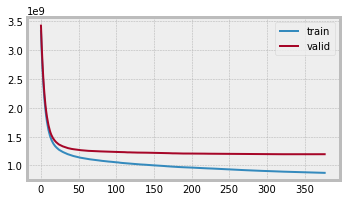

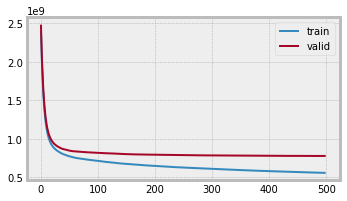

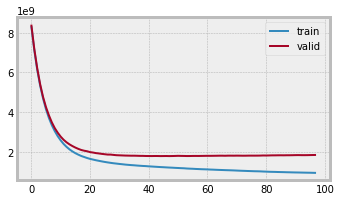

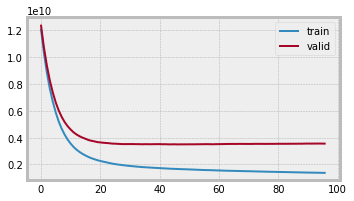

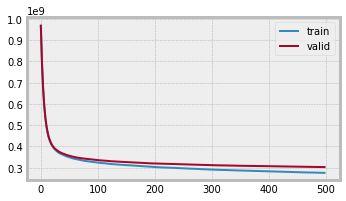

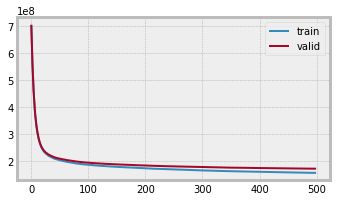

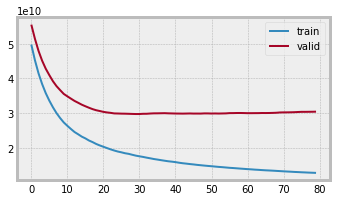

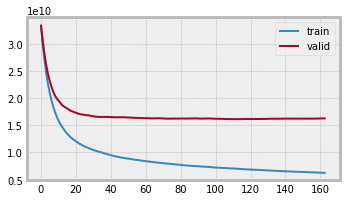

In [8]:
# Main loop
list_imp = list()
list_res = list()
list_out = list()

feat_target = 'Annual Amount unit'
feats_used = feats_cat + feats_num + feats_dt

filt_fold  = df.fold == 0
filt_null  = ~df[feat_target + ' RANK'].between(delta,1-delta)

for set_property in df_gr.index:
    for set_time in df_gr.columns:
        # Sets creation
        f1 = df['Property Type CLEAN'] == set_property
        f2 = df['reg_split'] == set_time
        filt_set   = f1&f2

        filt_train = ~filt_fold & ~filt_null & filt_set
        filt_valid = filt_fold & ~filt_null & filt_set
        filt_test  = filt_null & filt_set

        x, y   = df[filt_train][feats_used], df[filt_train][feat_target]
        xv, yv = df[filt_valid][feats_used], df[filt_valid][feat_target]
        xt, yt = df[filt_test][feats_used],  df[filt_test][feat_target]

        print(x.shape, xv.shape, xt.shape)
        print(round(y.mean()),round(yv.mean()),round(yt.mean()))


        # Training process
        import lightgbm as lgb

        x_ = lgb.Dataset(x.values, 
                        label = y, 
                        feature_name = feats_used,
                        categorical_feature = feats_cat,
                        free_raw_data=False)
        xv_ = lgb.Dataset(xv.values, 
                        label = yv, 
                        feature_name = feats_used,
                        categorical_feature = feats_cat,
                        free_raw_data=False)
        xt_ = lgb.Dataset(xt.values, 
                        label = yt, 
                        feature_name = feats_used,
                        categorical_feature = feats_cat,
                        free_raw_data=False)

        params = {
            'boosting_type': 'gbdt',
            'objective': 'regression',

            'learning_rate': 0.1,
            'num_boost_round': 500,
            'early_stopping_rounds': 50,

            'nthread': -1,
            'verbose': 0,

            # fitting params
            'boost_from_average': True,
            'scale_pos_weight': 1,

            'max_bin': 255,

            'num_leaves': 63,
            'max_depth': -1,
            'min_child_samples': 20,
            'min_child_weight': 1e-3,
            'min_split_gain': 0,

            'subsample': 1,
            'colsample_bytree': 1,

            'reg_alpha': 0, 
            'reg_lambda': 0,

        }

        evals_results = {}
        model_lgb     = lgb.train(params,
                                x_,
                                valid_sets=[x_, xv_ ], 
                                valid_names=['train', 'valid'], 
                                evals_result=evals_results, 
                                verbose_eval=1000, 
                                feval=None)
        p = pd.DataFrame(dict([(k,evals_results[k]['l2']) for k in evals_results])).plot(figsize = (5,3))
        
        # feature importances
        df_imp = pd.Series(model_lgb.feature_importance(), index = feats_used)
        df_imp = df_imp/sum(df_imp)
        df_imp = df_imp.reset_index()
        df_imp.rename(columns={'index':'feat',0:'imp'}, inplace = True)
        df_imp = df_imp.sort_values(by = 'imp')
        df_imp['time'] = set_time
        df_imp['property'] = set_property
        
        # results
        pred = model_lgb.predict(xv)
        pred = pred.clip(min = y.min(), max = y.max())
        df_res = yv.reset_index()
        del df_res['index']
        df_res['pred'] = pred
        df_res['mae'] = abs(df_res[feat_target] - df_res['pred'])
        df_res['mape'] = df_res['mae'] / df_res[feat_target]
        df_res['Property Size (sq.m)'] = xv['Property Size (sq.m)'].values
        df_res['time'] = set_time
        df_res['property'] = set_property
        
        out = list()
        out2 = list()
        n = df_res.shape[0]
        list_t = [0]
        for t in list_t:
            filt = df_res[feat_target] > t
            out.append(ts_metrics(df_res[filt][feat_target], df_res[filt].pred))
            out2.append(df_res[filt].shape[0] / n)
        df_out = pd.DataFrame(out)
        df_out['time'] = set_time
        df_out['property'] = set_property
        
        # collect results
        list_imp.append(df_imp)
        list_res.append(df_res)
        list_out.append(df_out)

In [9]:
df_out1 = pd.concat(list_out).groupby(['property','time']).min().unstack()
df_out1

mae                         mape              
time         1. Before 2018 2. After 2018 1. Before 2018 2. After 2018
property                                                              
Building        23,592.7296   18,349.3626         0.1475        0.1301
Land            18,635.8680   26,399.4427         0.2355        0.2237
Unit            11,239.9541    8,238.2029         0.1901        0.1628
Virtual Unit    89,630.2364   50,529.0243         0.4714        0.4374

In [10]:
df_imp1 = pd.concat(list_imp).groupby(['property','time','feat']).min().unstack().T
df_imp1

property                                Building                         Land  \
time                              1. Before 2018 2. After 2018 1. Before 2018   
    feat                                                                        
imp Contract Years                        0.0633        0.0494         0.1156   
    Nearest Landmark CLEAN LABEL          0.0136        0.0167         0.0071   
    Nearest Mall CLEAN LABEL              0.0055        0.0055         0.0034   
    Nearest Metro CLEAN LABEL             0.0752        0.0574         0.0595   
    No of Units                           0.0080        0.0048         0.0000   
    Project CLEAN LABEL                   0.0117        0.0286         0.0000   
    Property Size (sq.m)                  0.3839        0.3835         0.4214   
    Property Sub Type CLEAN LABEL         0.0087        0.0071         0.0000   
    Property Type CLEAN LABEL             0.0000        0.0000         0.0000   
    Usage CLEAN LABEL                     0.0092        0.0058         0.0054   
    free_hold                             0.0186        0.0134         0.0000   
    new_version                           0.0272        0.0477         0.0175   
    reg_month                             0.1323        0.1588         0.1415   
    reg_year                              0.0869        0.0838         0.0628   
    region LABEL                          0.1250        0.1064         0.0722   
    sector                                0.0310        0.0310         0.0938   

property                                                  Unit                \
time                              2. After 2018 1. Before 2018 2. After 2018   
    feat                                                                       
imp Contract Years                       0.0879         0.0594        0.0590   
    Nearest Landmark CLEAN LABEL         0.0058         0.0107        0.0104   
    Nearest Mall CLEAN LABEL             0.0014         0.0043        0.0048   
    Nearest Metro CLEAN LABEL            0.0625         0.1153        0.0983   
    No of Units                          0.0000         0.0527        0.0533   
    Project CLEAN LABEL                  0.0000         0.0412        0.0750   
    Property Size (sq.m)                 0.4348         0.2960        0.2997   
    Property Sub Type CLEAN LABEL        0.0000         0.0689        0.0645   
    Property Type CLEAN LABEL            0.0000         0.0000        0.0000   
    Usage CLEAN LABEL                    0.0034         0.0061        0.0054   
    free_hold                            0.0000         0.0071        0.0092   
    new_version                          0.0209         0.0184        0.0196   
    reg_month                            0.1709         0.0713        0.0591   
    reg_year                             0.0443         0.0541        0.0450   
    region LABEL                         0.0724         0.1755        0.1768   
    sector                               0.0957         0.0191        0.0199   

property                            Virtual Unit                
time                              1. Before 2018 2. After 2018  
    feat                                                        
imp Contract Years                        0.1731        0.1769  
    Nearest Landmark CLEAN LABEL          0.0059        0.0065  
    Nearest Mall CLEAN LABEL              0.0000        0.0010  
    Nearest Metro CLEAN LABEL             0.0425        0.0432  
    No of Units                           0.0000        0.0000  
    Project CLEAN LABEL                   0.0220        0.0290  
    Property Size (sq.m)                  0.3441        0.3428  
    Property Sub Type CLEAN LABEL         0.0032        0.0066  
    Property Type CLEAN LABEL             0.0000        0.0000  
    Usage CLEAN LABEL                     0.0000        0.0000  
    free_hold                             0.0000        0.0000  
    new_version              

In [11]:
df_res1 = pd.concat(list_res)
df_res1[:3]

,Annual Amount unit,pred,mae,mape,Property Size (sq.m),time,property
0,"220,000.0000","280,140.6183","60,140.6183",0.2734,369.0000,1. Before 2018,Building
1,"190,000.0000","222,809.8687","32,809.8687",0.1727,369.0000,1. Before 2018,Building
2,"250,000.0000","265,790.2574","15,790.2574",0.0632,NaN,1. Before 2018,Building


### Training (log target)

(132622, 16) (43541, 16) (19378, 16)
12 12 12
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002311 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[427]	train's l2: 0.0293661	valid's l2: 0.0390888
(155182, 16) (51577, 16) (22916, 16)
12 12 12
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003510 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Find whitespaces in feature_names, replace 

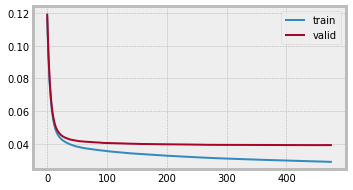

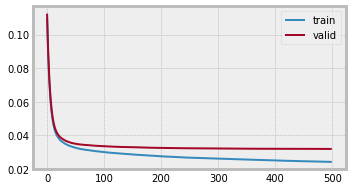

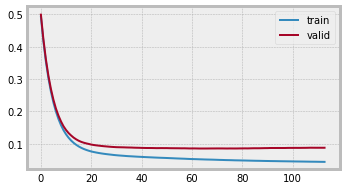

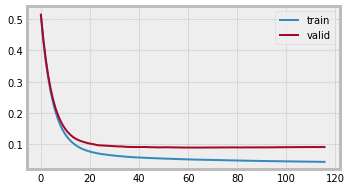

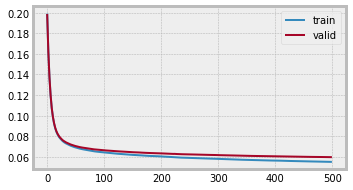

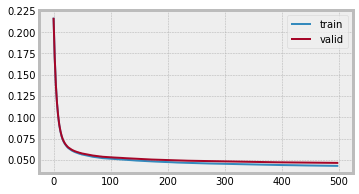

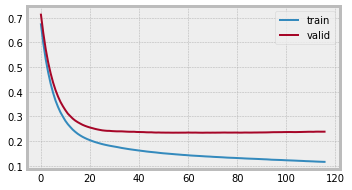

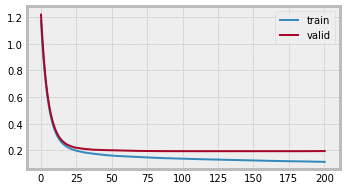

In [28]:
# Main loop
list_imp = list()
list_res = list()
list_out = list()

feat_target = 'Annual Amount unit LOG'
feats_used = feats_cat + feats_num + feats_dt

filt_fold  = df.fold == 0
filt_null  = ~df[feat_target[:-4] + ' RANK'].between(delta,1-delta)

for set_property in df_gr.index:
    for set_time in df_gr.columns:
        # Sets creation
        f1 = df['Property Type CLEAN'] == set_property
        f2 = df['reg_split'] == set_time
        filt_set   = f1&f2

        filt_train = ~filt_fold & ~filt_null & filt_set
        filt_valid = filt_fold & ~filt_null & filt_set
        filt_test  = filt_null & filt_set

        x, y   = df[filt_train][feats_used], df[filt_train][feat_target]
        xv, yv = df[filt_valid][feats_used], df[filt_valid][feat_target]
        xt, yt = df[filt_test][feats_used],  df[filt_test][feat_target]

        print(x.shape, xv.shape, xt.shape)
        print(round(y.mean()),round(yv.mean()),round(yt.mean()))

        # Training process
        import lightgbm as lgb

        x_ = lgb.Dataset(x.values, 
                        label = y, 
                        feature_name = feats_used,
                        categorical_feature = feats_cat,
                        free_raw_data=False)
        xv_ = lgb.Dataset(xv.values, 
                        label = yv, 
                        feature_name = feats_used,
                        categorical_feature = feats_cat,
                        free_raw_data=False)
        xt_ = lgb.Dataset(xt.values, 
                        label = yt, 
                        feature_name = feats_used,
                        categorical_feature = feats_cat,
                        free_raw_data=False)

        params = {
            'boosting_type': 'gbdt',
            'objective': 'regression',

            'learning_rate': 0.1,
            'num_boost_round': 500,
            'early_stopping_rounds': 50,

            'nthread': -1,
            'verbose': 0,

            # fitting params
            'boost_from_average': True,
            'scale_pos_weight': 1,

            'max_bin': 255,

            'num_leaves': 63,
            'max_depth': -1,
            'min_child_samples': 20,
            'min_child_weight': 1e-3,
            'min_split_gain': 0,

            'subsample': 1,
            'colsample_bytree': 1,

            'reg_alpha': 0, 
            'reg_lambda': 0,

        }

        evals_results = {}
        model_lgb     = lgb.train(params,
                                x_,
                                valid_sets=[x_, xv_ ], 
                                valid_names=['train', 'valid'], 
                                evals_result=evals_results, 
                                verbose_eval=1000, 
                                feval=None)

        p = pd.DataFrame(dict([(k,evals_results[k]['l2']) for k in evals_results])).plot(figsize = (5,3))
        
        # feature importances
        df_imp = pd.Series(model_lgb.feature_importance(), index = feats_used)
        df_imp = df_imp/sum(df_imp)
        df_imp = df_imp.reset_index()
        df_imp.rename(columns={'index':'feat',0:'imp'}, inplace = True)
        df_imp = df_imp.sort_values(by = 'imp')
        df_imp['time'] = set_time
        df_imp['property'] = set_property
        
        # results
        pred = model_lgb.predict(xv)
        pred = list(map(np.expm1, pred))
        df_res = yv.map(np.expm1).reset_index()
        del df_res['index']
        df_res['pred'] = pred
        df_res['mae'] = abs(df_res[feat_target] - df_res['pred'])
        df_res['mape'] = df_res['mae'] / df_res[feat_target]
        df_res['Property Size (sq.m)'] = xv['Property Size (sq.m)'].values
        df_res['time'] = set_time
        df_res['property'] = set_property
        
        out = list()
        out2 = list()
        n = df_res.shape[0]
        list_t = [0]
        for t in list_t:
            filt = df_res[feat_target] > t
            out.append(ts_metrics(df_res[filt][feat_target], df_res[filt].pred))
            out2.append(df_res[filt].shape[0] / n)
        df_out = pd.DataFrame(out)
        df_out['time'] = set_time
        df_out['property'] = set_property
        
        # collect results
        list_imp.append(df_imp)
        list_res.append(df_res)
        list_out.append(df_out)

In [29]:
df_out2 = pd.concat(list_out).groupby(['property','time']).min().unstack()
df_out2

mae                         mape              
time         1. Before 2018 2. After 2018 1. Before 2018 2. After 2018
property                                                              
Building        23,523.3997   18,312.5381         0.1421        0.1260
Land            17,123.5297   24,435.5901         0.1733        0.1708
Unit            11,141.9631    8,146.0674         0.1765        0.1510
Virtual Unit    83,946.6003   45,305.0559         0.3329        0.2910

In [30]:
df_imp2 = pd.concat(list_imp).groupby(['property','time','feat']).min().unstack().T
df_imp2

property                                Building                         Land  \
time                              1. Before 2018 2. After 2018 1. Before 2018   
    feat                                                                        
imp Contract Years                        0.0655        0.0519         0.1552   
    Nearest Landmark CLEAN LABEL          0.0103        0.0149         0.0048   
    Nearest Mall CLEAN LABEL              0.0065        0.0065         0.0055   
    Nearest Metro CLEAN LABEL             0.0684        0.0563         0.0537   
    No of Units                           0.0080        0.0042         0.0000   
    Project CLEAN LABEL                   0.0104        0.0352         0.0000   
    Property Size (sq.m)                  0.3703        0.3765         0.3803   
    Property Sub Type CLEAN LABEL         0.0086        0.0071         0.0000   
    Property Type CLEAN LABEL             0.0000        0.0000         0.0000   
    Usage CLEAN LABEL                     0.0069        0.0049         0.0060   
    free_hold                             0.0171        0.0140         0.0000   
    new_version                           0.0306        0.0487         0.0212   
    reg_month                             0.1504        0.1496         0.1399   
    reg_year                              0.0998        0.0878         0.0675   
    region LABEL                          0.1091        0.1081         0.0791   
    sector                                0.0380        0.0344         0.0867   

property                                                  Unit                \
time                              2. After 2018 1. Before 2018 2. After 2018   
    feat                                                                       
imp Contract Years                       0.0985         0.0586        0.0659   
    Nearest Landmark CLEAN LABEL         0.0072         0.0120        0.0111   
    Nearest Mall CLEAN LABEL             0.0046         0.0069        0.0064   
    Nearest Metro CLEAN LABEL            0.0587         0.1131        0.0944   
    No of Units                          0.0000         0.0574        0.0685   
    Project CLEAN LABEL                  0.0000         0.0396        0.0706   
    Property Size (sq.m)                 0.4131         0.2827        0.2776   
    Property Sub Type CLEAN LABEL        0.0000         0.0651        0.0653   
    Property Type CLEAN LABEL            0.0000         0.0000        0.0000   
    Usage CLEAN LABEL                    0.0031         0.0063        0.0058   
    free_hold                            0.0000         0.0058        0.0077   
    new_version                          0.0178         0.0180        0.0205   
    reg_month                            0.1765         0.0680        0.0567   
    reg_year                             0.0554         0.0533        0.0466   
    region LABEL                         0.0794         0.1945        0.1840   
    sector                               0.0857         0.0186        0.0188   

property                            Virtual Unit                
time                              1. Before 2018 2. After 2018  
    feat                                                        
imp Contract Years                        0.1789        0.1720  
    Nearest Landmark CLEAN LABEL          0.0079        0.0084  
    Nearest Mall CLEAN LABEL              0.0034        0.0016  
    Nearest Metro CLEAN LABEL             0.0426        0.0423  
    No of Units                           0.0000        0.0000  
    Project CLEAN LABEL                   0.0426        0.0613  
    Property Size (sq.m)                  0.3418        0.3137  
    Property Sub Type CLEAN LABEL         0.0046        0.0088  
    Property Type CLEAN LABEL             0.0000        0.0000  
    Usage CLEAN LABEL                     0.0000        0.0000  
    free_hold                             0.0000        0.0000  
    new_version              

In [31]:
df_res2 = pd.concat(list_res)
df_res2[:3]

,Annual Amount unit LOG,pred,mae,mape,Property Size (sq.m),time,property
0,"219,999.0000","281,776.8048","61,777.8048",0.2808,369.0000,1. Before 2018,Building
1,"189,999.0000","222,651.2257","32,652.2257",0.1719,369.0000,1. Before 2018,Building
2,"249,999.0000","267,530.8923","17,531.8923",0.0701,NaN,1. Before 2018,Building
